In [34]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from PIL import Image as PILImage

In [16]:
PATH = "../archive (1)/images_*/*/*"

In [17]:
images = glob.glob(os.path.join(PATH))

In [19]:
print(f'images count is {len(images)}')

images count is 112120


In [30]:
data_info = pd.read_csv('../archive (1)/Data_Entry_2017.csv')

In [51]:
data_info.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


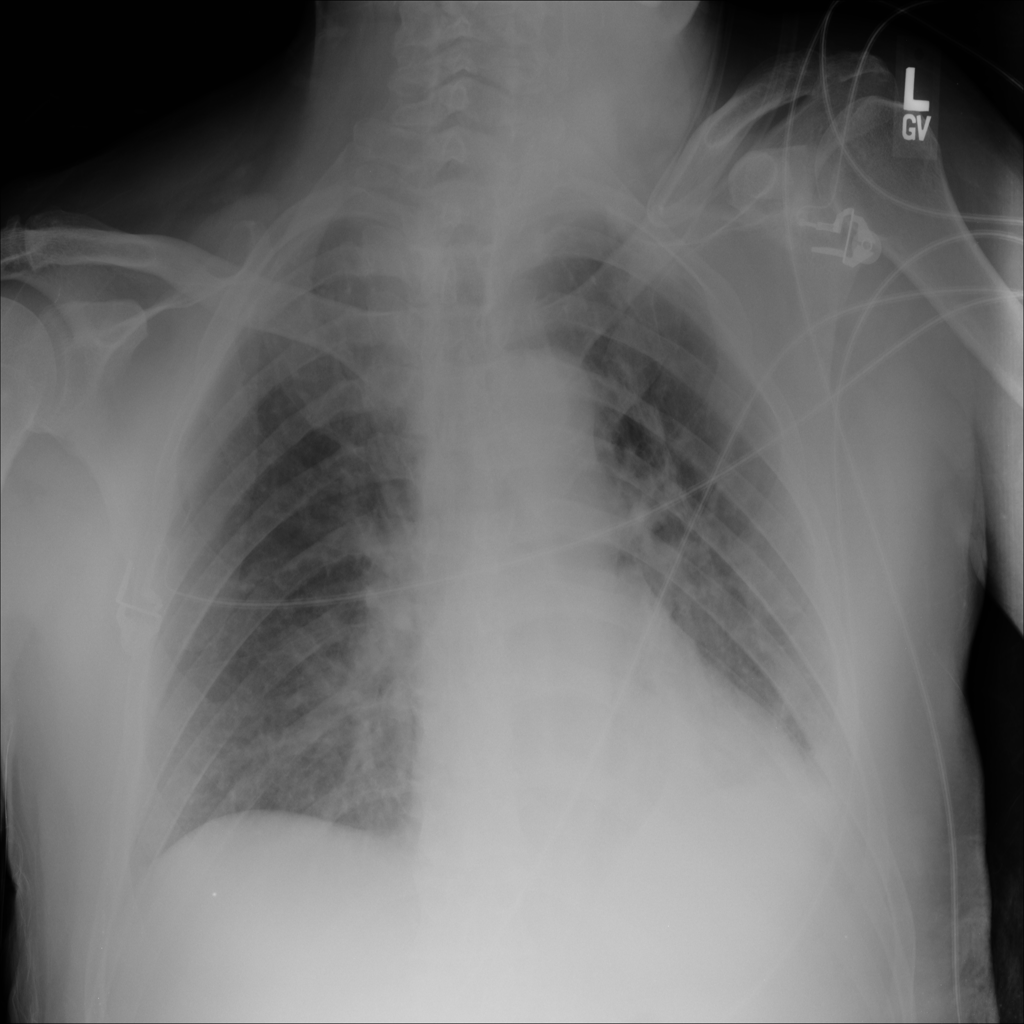

Label: Atelectasis|Infiltration
Image shape is (1024, 1024)
Image position: AP


In [40]:
for img_path in images:
    img_filename = os.path.basename(img_path)
    matching_row = data_info[data_info['Image Index'] == img_filename]

    if not matching_row.empty:
        display(Image(filename=img_path))

        pil_img = PILImage.open(img_path)
        print(f'Label: {matching_row["Finding Labels"].values[0]}')
        print(f'Image shape is {pil_img.size[::-1]}')  
        print(f'Image position: {matching_row['View Position'].values[0]}')
        break


In [ ]:
shapes = set()

for img_path in images:
	try:
		pil_img = PILImage.open(img_path)
		shapes.add(pil_img.size)
	except Exception as e:
		print(f"Error processing {img_path}: {e}")

print(f"Number of unique image shapes: {len(shapes)}")
print("Unique shapes (width, height):")
for shape in shapes:
	print(f"Width: {shape[0]}, Height: {shape[1]}")

Number of unique image shapes: 1
Unique shapes (width, height):
Width: 1024, Height: 1024


<Axes: xlabel='View Position', ylabel='Count'>

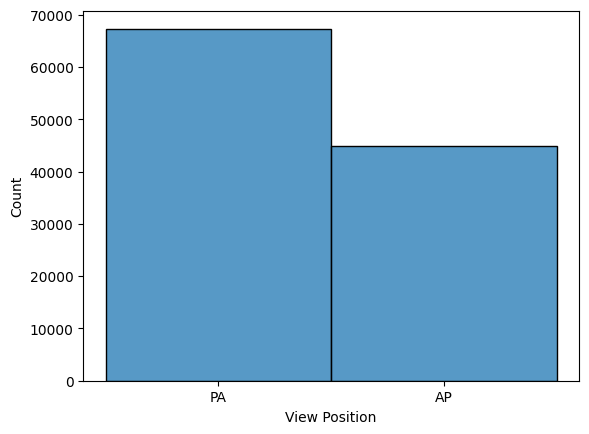

In [52]:
sns.histplot(data=data_info['View Position'])

In [42]:
data_info['View Position'].value_counts()

View Position
PA    67310
AP    44810
Name: count, dtype: int64

In [43]:
data_info['Image Index'].describe()

count               112120
unique              112120
top       00000001_000.png
freq                     1
Name: Image Index, dtype: object

In [44]:
data_info['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

In [ ]:
img_filenames = [os.path.basename(img_path) for img_path in images]

matching_rows = data_info[data_info['Image Index'].isin(img_filenames)]
print(f'Number of matching rows between images and CSV data: {len(matching_rows)}')

Number of matching rows between images and CSV data: 112120


### Outliers

In [53]:
from PIL import Image
import numpy as np

def get_image_stats(img_path):
    img = Image.open(img_path).convert("L")  
    arr = np.array(img)
    return {
        "mean": arr.mean(),
        "std": arr.std(),
        "min": arr.min(),
        "max": arr.max()
    }

outliers = []
for img_path in images:
    try:
        stats = get_image_stats(img_path)
        if stats["std"] < 5:  
            outliers.append((img_path, stats))
    except Exception as e:
        print(f"Error with {img_path}: {e}")


KeyboardInterrupt: 